**Predicting_Medical_Insurance_Costs**

Import Necessary Packages

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [85]:
#Loading the dataset
medical_df=pd.read_csv('medical_insurance.csv')

In [88]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [87]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**About the Data:**

age:age of the insured person(numeric)

sex:gender of the insured person(categorical:male/female)

bmi:body mass index of the insured person(numeric)

children:number of children covered by the the insurance plan(numeric)

smoker:whether the person is a smoker or not(categorical:yes/no)

region:region where the insured person resides(categorical:northeast/northwest/southeast/southwest)

charges:Insurance charges/costs billed to the insured person(numeric)

Exploring Data & Analysing Data

In [89]:
medical_df.shape

(2772, 7)

In [90]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [91]:
medical_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Data Visualization

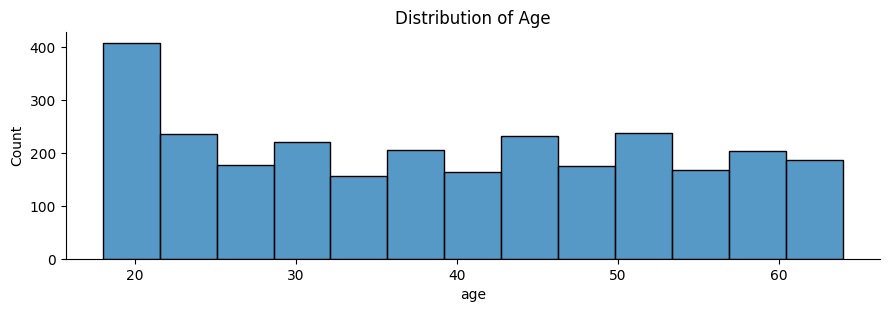

In [92]:
sns.displot(data=medical_df,x='age',height=3, aspect=3)
plt.title('Distribution of Age')
plt.show()

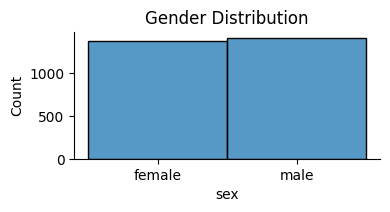

In [93]:
sns.displot(data=medical_df,x='sex',kind='hist',height=2, aspect=2)
plt.title('Gender Distribution')
plt.show()

In [94]:
medical_df['sex'].value_counts()

,count
sex,
male,1406
female,1366


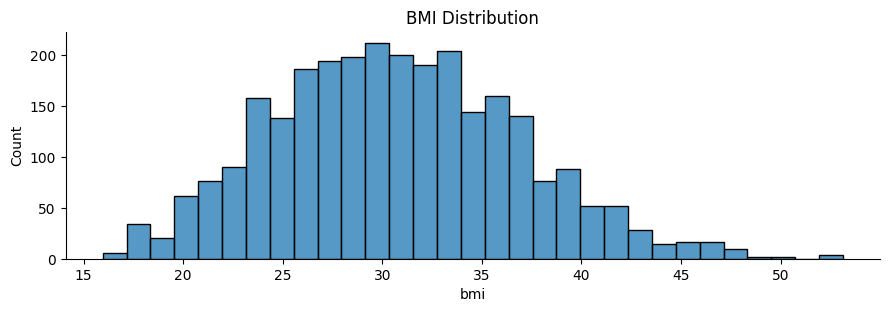

In [95]:
sns.displot(data=medical_df,x='bmi',height=3, aspect=3)
plt.title('BMI Distribution')
plt.show()

In [96]:
medical_df['bmi'].value_counts()

,count
bmi,
32.300,26
28.310,18
33.330,16
30.800,16
30.875,16
...,...
46.200,2
23.800,2
44.770,2


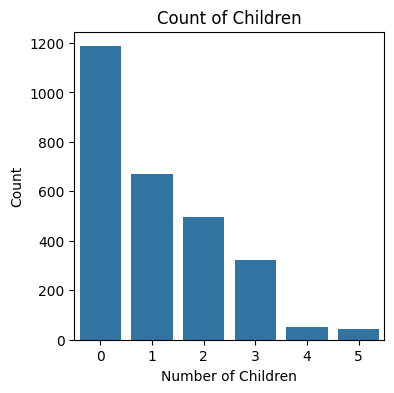

In [97]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='children')
plt.title('Count of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

In [98]:
medical_df['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


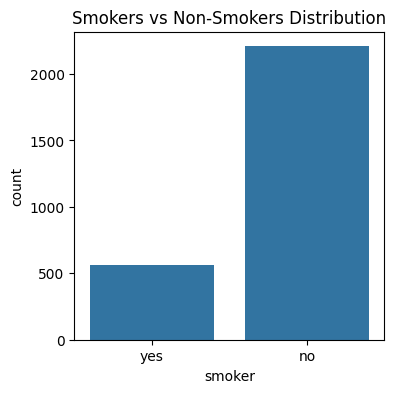

In [100]:
plt.figure(figsize=(4, 4))
sns.countplot(data=medical_df, x='smoker')
plt.title('Smokers vs Non-Smokers Distribution')
plt.show()

In [101]:
medical_df['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


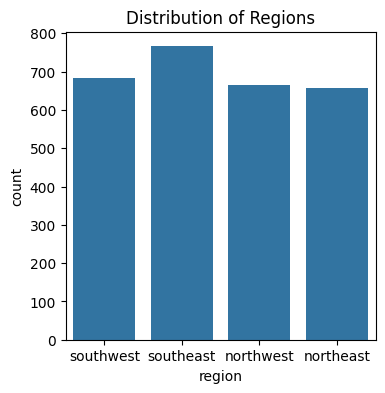

In [102]:
plt.figure(figsize=(4, 4))
sns.countplot(data=medical_df, x='region')
plt.title('Distribution of Regions')
plt.show()

In [103]:
medical_df['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


Data Preprocessing: Convert categorical data to numerical

In [104]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)

<ipython-input-104-1425d46b0c84>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-104-1425d46b0c84>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-104-1425d46b0c84>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beha

Feature Engineering

In [105]:
#Interaction between BMI and Smoker
medical_df['BMI_smoker'] = medical_df['bmi'] * medical_df['smoker']
medical_df['BMI_smoker']

,BMI_smoker
0,0.000
1,33.770
2,33.000
3,22.705
4,28.880
...,...
2767,45.320
2768,34.600
2769,0.000
2770,18.715


In [106]:
#splitting data into features and target
X=medical_df.drop('charges',axis=1)
y=medical_df['charges']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [108]:
X_train.shape

(2494, 7)

In [109]:
X_test.shape

(278, 7)

Model Training: Linear Regression


In [111]:
lg=LinearRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

Model Evaluation for Linear Regression

In [69]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.7112783312341975
MAE: 4250.610452922711
MSE: 42593467.19579426
RMSE: 6526.367074858283


Model Evaluation: Random Forest


In [113]:
rf = RandomForestRegressor(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Model Evaluation for Random Forest

In [73]:
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2 Score: 0.949276727710472
MAE: 1271.9460503033097
MSE: 7482916.137062901
RMSE: 2735.4919369398444


Prediction System

In [121]:
#Interactive Prediction
print("Enter the following details for prediction:")
age = int(input("Age: "))
sex = int(input("Sex (0 for male, 1 for female): "))
bmi = float(input("BMI: "))
children = int(input("Number of children: "))
smoker = int(input("Smoker (0 for yes, 1 for no): "))
region = int(input("Region (0: southeast, 1: southwest, 2: northwest, 3: northeast): "))

Enter the following details for prediction:
Age: 19
Sex (0 for male, 1 for female): 1
BMI: 27.9
Number of children: 0
Smoker (0 for yes, 1 for no): 0
Region (0: southeast, 1: southwest, 2: northwest, 3: northeast): 1


In [123]:
#Input features
input_features = np.array([age, sex, bmi, children, smoker, region, bmi * smoker]).reshape(1, -1)
predicted_cost = rf.predict(input_features)
print(f"Predicted Medical Insurance Charges: ${predicted_cost[0]:.5f}")

Predicted Medical Insurance Charges: $16902.53396


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
